In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [36]:
# Load and preprocess dataset
data_file = "CMAPSS_CSV/train_FD001.csv"  # Update path as needed
data = pd.read_csv(data_file)

In [37]:
# Preprocess data
data.fillna(method='ffill', inplace=True)
features = data.columns[2:]  # Assuming first two columns are 'unit_number' and 'time_in_cycles'
X = data[features]

/tmp/ipykernel_49318/171558983.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [38]:
# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [39]:
# Define Autoencoder model
input_dim = data.shape[1]
encoding_dim = 10  # Dimension of the encoded representation

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model (to extract the encoded representation)
encoder = Model(inputs=input_layer, outputs=encoded)

# Decoder model (to reconstruct the input from encoded representation)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))


In [40]:
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')


In [41]:
history = autoencoder.fit(
    data, data,  # Training data and targets are the same
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: -0.3458 - val_loss: -5.1030
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: -11.7579 - val_loss: -21.6000
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: -39.1788 - val_loss: -47.3041
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: -80.1130 - val_loss: -80.9395
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: -131.9177 - val_loss: -121.9698
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: -193.0522 - val_loss: -169.4662
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: -257.5328 - val_loss: -222.9443
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: -343.1885 - val_loss: -281.6890
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: -425.2439 - val_loss: -345.7747
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: -516.0061 - val_loss: -415.4954
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: -624.7

In [42]:
# Evaluate the autoencoder
loss = autoencoder.evaluate(data, data)
print(f'Loss: {loss}')

# Encode and decode some data
encoded_data = encoder.predict(data)
decoded_data = decoder.predict(encoded_data)


645/645 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: -11953.6943
Loss: -9722.09375
645/645 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step
645/645 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


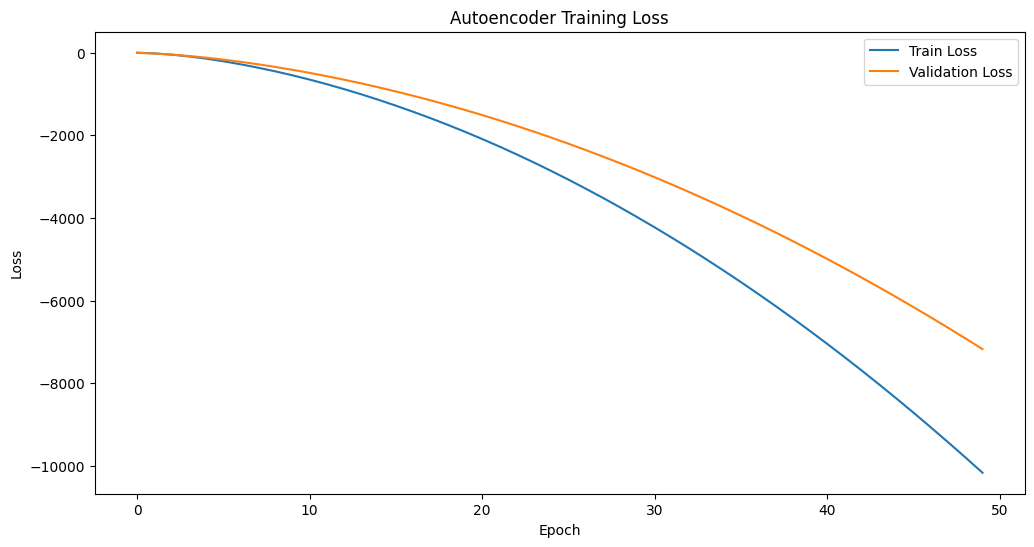

In [43]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()